In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('dtutf_idf_dari_dilla.csv')
df.head()

,Unnamed: 0,tweet,label,Tokenize,Wordlist,Stemming,abai,aborsi,adab,adik,...,usap,usia,verbal,victim,video,viral,vonis,wanita,warga,waspada
0,0,kalo cewe jual video syur cepet banget nangkep...,not urgent,"['kalo', 'cewe', 'jual', 'video', 'syur', 'cep...","['cewe', 'jual', 'video', 'syur', 'nangkepnya'...",cewek jual video syur tangkap cowok laku keras...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.362223,0.0,0.0,0.0,0.0,0.0
1,1,adalah penyintas korban percobaan kekerasan s...,urgent,"['adalah', 'penyintas', 'korban', 'percobaan',...","['penyintas', 'korban', 'percobaan', 'kekerasa...",sintas korban coba keras seksual hasil lari ak...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,2,uu tpks udah bisa digunakan buat menjerat pela...,not urgent,"['uu', 'tpks', 'udah', 'bisa', 'digunakan', 'b...","['menjerat', 'pelaku', 'kekerasan', 'seksual',...",jerat laku keras seksual baca ingat jadi laku ...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,3,gak heran banyak anak yang diam ketika mengala...,not urgent,"['gak', 'heran', 'banyak', 'anak', 'yang', 'di...","['heran', 'anak', 'diam', 'mengalami', 'seksua...",heran anak diam alami seksual orang tua bilang...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,4,sama kaya di kampus saya korban pelecehan seks...,not urgent,"['sama', 'kaya', 'di', 'kampus', 'saya', 'korb...","['kampus', 'korban', 'pelecehan', 'seksual', '...",kampus korban leceh seksual sanksi layan akade...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [3]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
#X = df.iloc[0]
X = df.iloc[:, 4]
X

0      cewek jual video syur tangkap cowok laku keras...
1      sintas korban coba keras seksual hasil lari ak...
2      jerat laku keras seksual baca ingat jadi laku ...
3      heran anak diam alami seksual orang tua bilang...
4      kampus korban leceh seksual sanksi layan akade...
                             ...                        
100    bingung tanggap aborsi risiko anak telantar al...
101    vonis hukum mati laku perkosa anak perempuan h...
102                                   keras seksual anak
103    benar sekali benci laku keras hilang nyawa man...
104    silah cek tingkat keras anak perempuan nikah u...
Name: Stemming, Length: 105, dtype: object

In [5]:
df.iloc[:,4]

0      cewek jual video syur tangkap cowok laku keras...
1      sintas korban coba keras seksual hasil lari ak...
2      jerat laku keras seksual baca ingat jadi laku ...
3      heran anak diam alami seksual orang tua bilang...
4      kampus korban leceh seksual sanksi layan akade...
                             ...                        
100    bingung tanggap aborsi risiko anak telantar al...
101    vonis hukum mati laku perkosa anak perempuan h...
102                                   keras seksual anak
103    benar sekali benci laku keras hilang nyawa man...
104    silah cek tingkat keras anak perempuan nikah u...
Name: Stemming, Length: 105, dtype: object

In [6]:
#X = np.asarray(X).astype(np.float32)

In [7]:
dt = df.copy()

#Mengambil kalimat
kalimat = dt.Stemming.values.tolist()
kalimat_training = kalimat[0:95]
kalimat_testing = kalimat[95:]

In [8]:
label = df.iloc[0: , 1]

In [9]:
label = label.tolist()
print(label)

['not urgent', 'urgent', 'not urgent', 'not urgent', 'not urgent', 'not urgent', 'urgent', 'not urgent', 'urgent', 'not urgent', 'urgent', 'not urgent', 'not urgent', 'urgent', 'urgent', 'urgent', 'urgent', 'urgent', 'not urgent', 'urgent', 'not urgent', 'urgent', 'urgent', 'not urgent', 'urgent', 'not urgent', 'urgent', 'not urgent', 'urgent', 'urgent', 'not urgent', 'urgent', 'not urgent', 'urgent', 'not urgent', 'not urgent', 'urgent', 'not urgent', 'urgent', 'urgent', 'not urgent', 'not urgent', 'urgent', 'not urgent', 'urgent', 'not urgent', 'not urgent', 'not urgent', 'not urgent', 'not urgent', 'not urgent', 'urgent', 'urgent', 'urgent', 'urgent', 'not urgent', 'urgent', 'urgent', 'not urgent', 'not urgent', 'not urgent', 'not urgent', 'urgent', 'not urgent', 'not urgent', 'not urgent', 'urgent', 'urgent', 'urgent', 'urgent', 'urgent', 'not urgent', 'not urgent', 'not urgent', 'not urgent', 'not urgent', 'not urgent', 'not urgent', 'not urgent', 'not urgent', 'not urgent', 'urge

In [10]:
vocab_size = 300
max_length = 150
embed_dim = 30
trunc_type = 'post'
oov_tok = "<OOv>"

# Kalimat Training

In [11]:
#Lakukan inisialisasi tokenizing
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)

#Melakukan hasil inisialisasi tokenize pada kalimat
tokenizer.fit_on_texts(kalimat_training)

#Tampilkan panjang word index
word_index = tokenizer.word_index
print(f'Panjang kata di word index : {len(word_index)}')

#Tampilkan word indedx
print(f'Word index : {word_index}')

Panjang kata di word index : 547
Word index : {'<OOv>': 1, 'leceh': 2, 'seksual': 3, 'korban': 4, 'laku': 5, 'wanita': 6, 'salah': 7, 'pakai': 8, 'cerita': 9, 'orang': 10, 'perempuan': 11, 'trauma': 12, 'jadi': 13, 'kayak': 14, 'baju': 15, 'perkosa': 16, 'cewek': 17, 'keras': 18, 'duga': 19, 'tolak': 20, 'tutup': 21, 'teman': 22, 'baca': 23, 'anggap': 24, 'malam': 25, 'takut': 26, 'lapor': 27, 'pikir': 28, 'tindak': 29, 'kasih': 30, 'cowok': 31, 'alami': 32, 'bilang': 33, 'laki': 34, 'buka': 35, 'kena': 36, 'kantor': 37, 'bikin': 38, 'nikah': 39, 'moga': 40, 'pria': 41, 'aurat': 42, 'pukul': 43, 'tidak': 44, 'kakak': 45, 'anak': 46, 'tua': 47, 'kampus': 48, 'kenal': 49, 'badan': 50, 'nama': 51, 'bela': 52, 'sakit': 53, 'gimana': 54, 'kasar': 55, 'main': 56, 'nafsu': 57, 'buat': 58, 'parah': 59, 'maju': 60, 'coba': 61, 'hasil': 62, 'ingat': 63, 'miris': 64, 'diam': 65, 'dunia': 66, 'ajak': 67, 'temu': 68, 'lucu': 69, 'syok': 70, 'beku': 71, 'satu': 72, 'pake': 73, 'bawa': 74, 'verbal': 

In [12]:
#Generate daan pad the sequences
sequences = tokenizer.texts_to_sequences(kalimat_training)
padded = pad_sequences(sequences, maxlen = max_length, truncating = trunc_type)
padded

array([[  0,   0,   0, ...,   3, 207, 208],
       [  0,   0,   0, ..., 105,   5,   9],
       [  0,   0,   0, ..., 108, 109,  64],
       ...,
       [  0,   0,   0, ...,   1,  53,  50],
       [  0,   0,   0, ..., 133,   1,  43],
       [  0,   0,   0, ...,   1,   6,  16]])

In [13]:
index = 2
print(f'data sample teratas : {kalimat_training[index]}')
print(f'sequnces sample : {padded[index]}')

data sample teratas : jerat laku keras seksual baca ingat jadi laku korban atur tidak kakak layan pulih miris
sequnces sample : [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 211   5  18   3  23  63  13   5   4
 107  44  45 108 109  64]


In [14]:
print(f'Shape result : {padded.shape}')

Shape result : (95, 150)


# Kalimat Testing

In [15]:
testing_sequences = tokenizer.texts_to_sequences(kalimat_testing)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length)

In [16]:
testing_padded.shape

(10, 150)

In [17]:
labell_ = label.copy()
#print(labell_)
encoder = LabelEncoder()
labell_ = encoder.fit_transform(labell_)
labell_

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

# Label

In [18]:
label_final = np.array(labell_)
train_label_final = label_final[0:95]
testing_label_final = label_final[95:]

In [19]:
train_label_final

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [20]:
testing_label_final

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

# Model

In [21]:
from tensorflow.keras import regularizers
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embed_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Setup the training parameters
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 30)           9000      
_________________________________________________________________
flatten (Flatten)            (None, 4500)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               2304512   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8

In [22]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90 and logs.get('val_accuracy') > 0.85):
      print("\nReached 95% accuracy and Val_Accuracy 0.80 so cancelling training and validation!")
      self.model.stop_training = True

In [23]:
num_epochs = 100
callbacks = myCallback()
history = model.fit(padded, train_label_final, 
          epochs = num_epochs,
          validation_data = (testing_padded, testing_label_final),
          callbacks=callbacks)
history

Epoch 1/100
3/3 [==============================] - 1s 101ms/step - loss: 0.7094 - accuracy: 0.4947 - val_loss: 0.7062 - val_accuracy: 0.4000
Epoch 2/100
3/3 [==============================] - 0s 30ms/step - loss: 0.6975 - accuracy: 0.4105 - val_loss: 0.6924 - val_accuracy: 0.6000
Epoch 3/100
3/3 [==============================] - 0s 28ms/step - loss: 0.6917 - accuracy: 0.5053 - val_loss: 0.6954 - val_accuracy: 0.4000
Epoch 4/100
3/3 [==============================] - 0s 28ms/step - loss: 0.6900 - accuracy: 0.5158 - val_loss: 0.7015 - val_accuracy: 0.4000
Epoch 5/100
3/3 [==============================] - 0s 30ms/step - loss: 0.6948 - accuracy: 0.4842 - val_loss: 0.7048 - val_accuracy: 0.4000
Epoch 6/100
3/3 [==============================] - 0s 30ms/step - loss: 0.6901 - accuracy: 0.5053 - val_loss: 0.7048 - val_accuracy: 0.4000
Epoch 7/100
3/3 [==============================] - 0s 32ms/step - loss: 0.6946 - accuracy: 0.5263 - val_loss: 0.7000 - val_accuracy: 0.4000
Epoch 8/100
3/3 [==

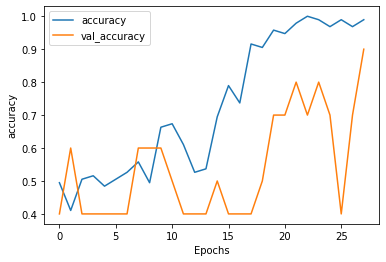

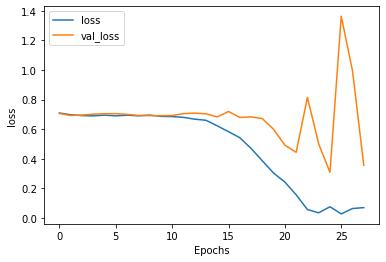

In [24]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [25]:
predict_testing = np.round(model.predict(testing_padded).ravel()).astype(int)
predict_training = np.round(model.predict(padded).ravel()).astype(int)

print("Actually testing labels : {}".format(testing_label_final))
print("Result Of Testing Predict : {}".format(predict_testing))
print("\n\n Actually training labels : {}".format(train_label_final))
print("\nResult of Training Predict : {}".format(predict_training))

Actually testing labels : [1 1 0 0 1 0 1 1 1 0]
Result Of Testing Predict : [1 1 0 0 1 1 1 1 1 0]


 Actually training labels : [0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1]

Result of Training Predict : [0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1]


In [26]:
#TRAINING REPORT
print(classification_report(train_label_final, predict_training))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.98      1.00      0.99        47

    accuracy                           0.99        95
   macro avg       0.99      0.99      0.99        95
weighted avg       0.99      0.99      0.99        95



In [27]:
#TESTING REPORT
print(classification_report(testing_label_final,predict_testing))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



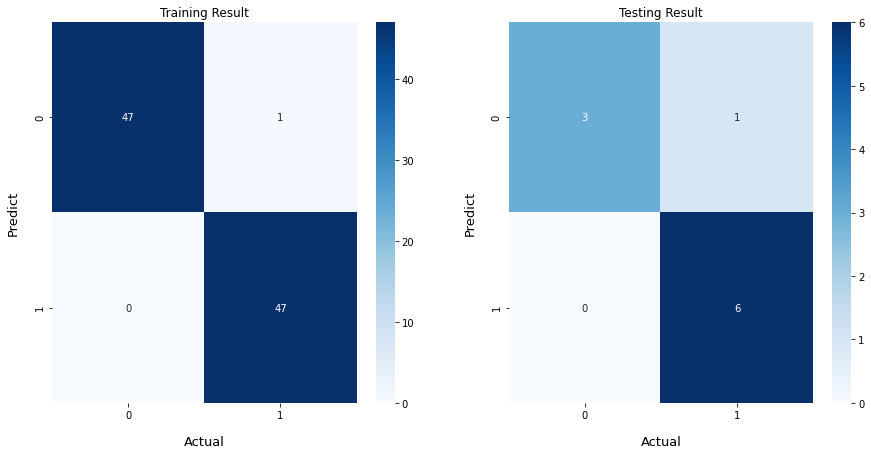

In [28]:
figure, axes = plt.subplots(1,2 ,figsize = (15,7) , sharex = True)

axes[0].set_title('Training Result')
cm_training = confusion_matrix(train_label_final, predict_training)
ax = sns.heatmap(cm_training, annot = True, cmap = 'Blues', ax = axes[0])
ax.set_xlabel('Actual', fontsize = 13, labelpad = 15)
ax.set_ylabel('Predict', fontsize = 13, labelpad = 15)


axes[1].set_title('Testing Result')
cm_testing = confusion_matrix(testing_label_final, predict_testing)
ax = sns.heatmap(cm_testing, annot = True, cmap = 'Blues', ax = axes[1])
ax.set_xlabel('Actual', fontsize = 13, labelpad = 15)
ax.set_ylabel('Predict', fontsize = 13, labelpad = 15)

plt.show()

In [29]:
teks_pred = ['aku tidak dilecehkan oleh pria itu kok, aman saja']
token_teks_pred = tokenizer.texts_to_sequences(teks_pred)
padd_pred = pad_sequences(token_teks_pred, maxlen = max_length)
scores = np.round(model.predict(padd_pred)).astype(int)
scores
print('Urgent' if scores == 1 else 'Not Urgent')

Not Urgent


In [31]:
teks_pred2 = ['Seorang wanita dilecehkan oleh seseorang pria']
token_teks_pred = tokenizer.texts_to_sequences(teks_pred2)
padd_pred = pad_sequences(token_teks_pred, maxlen = max_length)
scores = np.round(model.predict(padd_pred)).astype(int)
scores
print('Urgent' if scores == 1 else 'Not Urgent')

Urgent


In [33]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('Model_Final.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\adiba\AppData\Local\Temp\tmpc7wmip6q\assets


INFO:tensorflow:Assets written to: C:\Users\adiba\AppData\Local\Temp\tmpc7wmip6q\assets
